Importing Libraries

In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_tweets.csv')

In [3]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


# Data Inspection

In [4]:
train[train.label == 0]

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first time in 2 years
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad


In [5]:
train[train.label == 1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenny #kentucky
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme
31947,31948,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!"


In [6]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [7]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In train dataset we have 7%(2242) tweets of class 1 and 93%(29720) of class 2.

Typically to train a model 50-50% or 45-55% data is required.

So, our data is imbalanced one.

In [8]:
train.tweet.str.len()  # computes length of each element in the series

0        102
1        122
2         21
3         86
4         39
        ... 
31957     68
31958    131
31959     63
31960     67
31961     32
Name: tweet, Length: 31962, dtype: int64

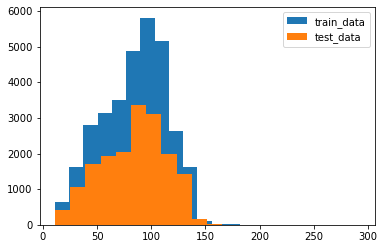

In [9]:
plt.hist(train.tweet.str.len(),bins = 20, label = 'train_data')
plt.hist(test.tweet.str.len(), bins = 20, label = 'test_data')
plt.legend()
plt.show()

# Data Cleaning
Removing punctuations, special characters, numbers and terms which don't carry much weightage in context of text.

In [10]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [11]:
combined_data = train.append(test, ignore_index=True) # combining the data will make it easy for us to preprocess the data
combined_data .shape

(49159, 3)

In [12]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)  # Return a list of all non-overlapping matches in the string.
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [13]:
fn = lambda x: remove_pattern(x,'@[\w]')

Removing twitter handles

In [14]:
# pattern '@[]'' is regular expression which will pick any word starting with '@''
combined_data['tidy_tweet'] = np.vectorize(remove_pattern)(combined_data['tweet'],'@[\w]')
# np.vectorize --- Define a vectorized function which takes a nested sequence of objects or
# numpy arrays as inputs and returns a single numpy array or a tuple of numpy arrays

In [15]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,ser when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,ser ser thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Removing punctuations, numbers and special characters

In [16]:
combined_data['tidy_tweet'] = combined_data['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')
# replacing everything except characters and hashtags with spaces

<ipython-input-16-76ddf1678e32>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_data['tidy_tweet'] = combined_data['tidy_tweet'].str.replace('[^a-zA-Z#]',' ')


In [17]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,ser when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,ser ser thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [18]:
combined_data['tidy_tweet'] = combined_data['tidy_tweet'].apply(lambda x: ' '.join([i for i in x.split() if len(i)>3]))
# removing words with length less than 3 like oh, Hmm

In [19]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


# Text tokenization
tokenization is a process of splitting string of texts into tokens

In [20]:
tokenized_tweets = combined_data['tidy_tweet'].apply(lambda x: x.split())

In [21]:
tokenized_tweets.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

# Normalizing tokenized tweets

In [22]:
from nltk.stem.porter import PorterStemmer

In [23]:
stemmer = PorterStemmer()

In [24]:
tokenized_tweets = tokenized_tweets.apply(lambda x : [stemmer.stem(i) for i in x])  # stemming
'''Some more example of stemming for root word "like" include:

-> "likes"
-> "liked"
-> "likely"
-> "liking"'''

'Some more example of stemming for root word "like" include:\n\n-> "likes"\n-> "liked"\n-> "likely"\n-> "liking"'

In [25]:
tokenized_tweets.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [26]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i] )

In [27]:
combined_data['tidy_tweet'] = tokenized_tweets

In [28]:
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Understanding most common words used in the tweets : Wordcloud
Worldcloud is a visualization wherein the most frequent words appear in large size and less frequent word appears in small sizes

In [29]:
all_words = ' '.join([text for text in combined_data['tidy_tweet']])

In [30]:
# pip install wordcloud

In [31]:
from wordcloud import WordCloud

In [32]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

In [33]:
wordcloud

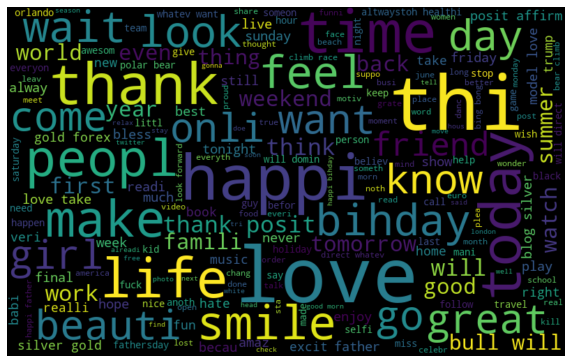

In [34]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

words in non racist/sexist tweets

In [35]:
normal_words = ' '.join([text for text in combined_data['tidy_tweet'] [combined_data['label']==0]])

In [36]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

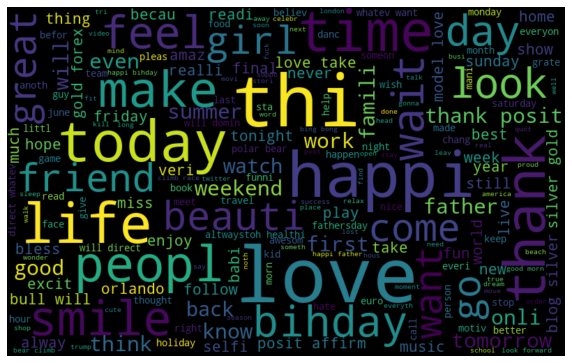

In [37]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# most of the words have +ve connotations

words in racist/sexist tweets

In [38]:
negative_words = ' '.join([text for text in combined_data['tidy_tweet'] [combined_data['label']==1]])

In [39]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

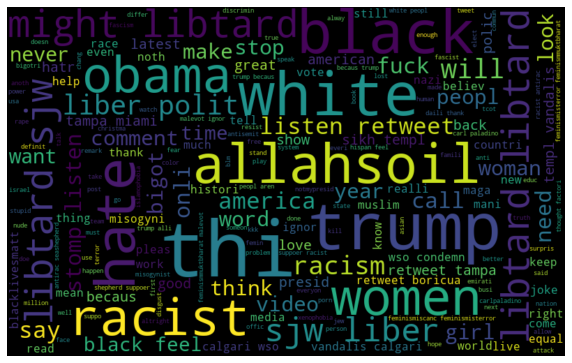

In [40]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# most of the words have -ve connotations

Understanding impact of hashtags on the tweets sentiment

In [41]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i) # loop over the words in the tweet
        hashtags.append(ht)
    return hashtags

In [42]:
# Extracting hashtags from non racist tweets
HT_regular = hashtag_extract(combined_data['tidy_tweet'][combined_data['label']==0])

In [43]:
HT_regular[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [44]:
# Extracting hashtags from racist tweets
HT_negative = hashtag_extract(combined_data['tidy_tweet'][combined_data['label']==1])

In [45]:
HT_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [46]:
# Preparing list of hashtags for both the sentiments
# unnesting list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

In [47]:
HT_regular[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [48]:
HT_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

Non racist tweets

In [49]:
a = nltk.FreqDist(HT_regular) 
d=pd.DataFrame({'Hashtag':list(a.keys()), 'Count':list(a.values())})

In [50]:
# selecting top 20 most frequent hashtags
d=d.nlargest(columns='Count', n=20)

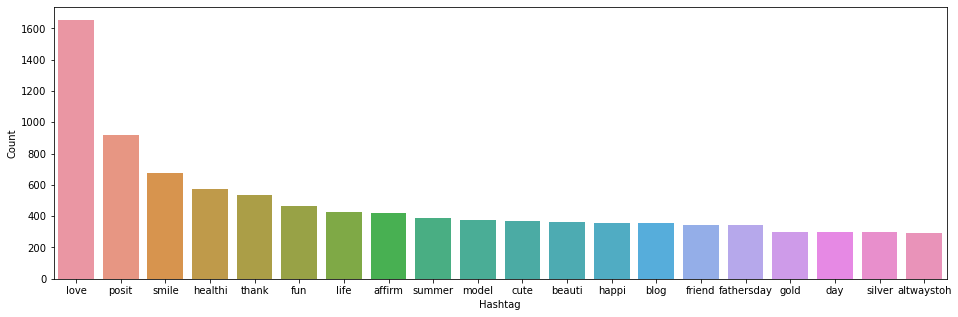

In [51]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

racist tweets

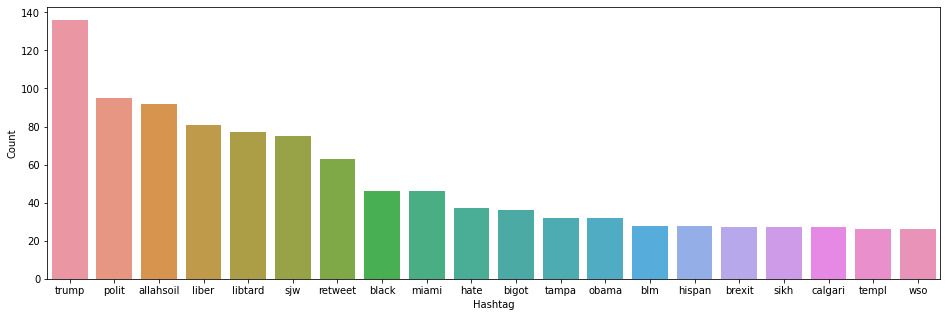

In [52]:
b = nltk.FreqDist(HT_negative) 
e=pd.DataFrame({'Hashtag':list(b.keys()), 'Count':list(b.values())})
# selecting top 20 most frequent hashtags
e=e.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x='Hashtag', y='Count')
ax.set(ylabel='Count')
plt.show()

In [53]:
# here most of the ters are -ve with a few neutral terms as well. So, its not a bad idea to keep these hashtags in our data
# as they contain usefoil information

Bag of words feature

In [54]:
# pip install gensim

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [56]:
bow_vectorizer = CountVectorizer(max_df=0.9,min_df=2, max_features=1000, stop_words='english')

In [57]:
bow = bow_vectorizer.fit_transform(combined_data['tidy_tweet']) # bow - bag of words

In [58]:
bow

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 191485 stored elements in Compressed Sparse Row format>

In [59]:
bow.shape

(49159, 1000)

TF-IDF features - It works by penalising the common words by assigning lower weight wjile giving importance to rare words in the entire corpus but appears in good numbers in few documents

TF = No of times a term t appears in a document/no of terms in the document

IDF = Log(N/n) where N is no of documents and n is a number of documents term t has appeared

TF-IDF = TF*IDF

In [60]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9,min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combined_data['tidy_tweet']) 

In [61]:
tfidf.shape

(49159, 1000)

Word2Vec Embeddings

In [62]:
tokenized_tweet = combined_data['tidy_tweet'].apply(lambda x: x.split())  # tokenizing

In [63]:
model_w2v = gensim.models.Word2Vec(tokenized_tweet, vector_size=200 # desired no of features/independent variables
                                  , window=5                # context window size
                                  , min_count=2, sg=1       # 1 for skipgram model
                                  , hs=0, negative=10       # for negative sampling
                                  , workers=2               # no of cores
                                  , seed=34)

In [64]:
model_w2v.train(tokenized_tweet, total_examples=len(combined_data['tidy_tweet']), epochs = 20)

(6509687, 7535880)

In [65]:
model_w2v.wv.most_similar(positive='dinner')

[('spaghetti', 0.5494291186332703),
 ('#cellar', 0.543358564376831),
 ('#avocado', 0.5385099649429321),
 ('dess', 0.5328553915023804),
 ('aladdin', 0.5293105244636536),
 ('cookout', 0.5292964577674866),
 ('#toast', 0.5285747647285461),
 ('fizz', 0.5227904319763184),
 ('fav', 0.5210759043693542),
 ('#biall', 0.5202085375785828)]

In [66]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.565428614616394),
 ('phoni', 0.5470356345176697),
 ('hillari', 0.5367799997329712),
 ('unstabl', 0.5353155136108398),
 ('businessman', 0.5245406627655029),
 ('#delegaterevolt', 0.5212356448173523),
 ('unfavor', 0.5211158394813538),
 ('tomlin', 0.519467294216156),
 ('melo', 0.5193198323249817),
 ('nomine', 0.5174769759178162)]

In [67]:
model_w2v.wv['food']

array([ 5.8002752e-01,  1.6907136e-01,  5.9055883e-02,  1.1213054e-01,
       -2.8584740e-01,  1.3341229e-01, -1.7798948e-01, -8.3981645e-01,
       -4.1740733e-01, -2.5109455e-01, -2.5638121e-01, -4.1199677e-02,
       -2.4286762e-01,  3.5518390e-01, -3.5946873e-01, -7.3534858e-01,
        5.8355723e-02,  3.5666415e-01, -3.7194457e-02, -2.7094990e-01,
        9.8767631e-02,  3.0067772e-01,  1.4212881e-01,  5.0802058e-01,
       -7.7908236e-01, -4.5351207e-01, -5.7817984e-01, -3.7905443e-01,
       -9.1534015e-03, -6.6399890e-01, -1.7059903e-01, -9.3089366e-01,
       -5.8673346e-01, -4.4948831e-01,  3.5828197e-01, -6.6459227e-01,
        4.0880004e-01,  2.1249095e-01,  1.8727458e-01, -5.8235984e-02,
       -7.2854435e-01,  3.5284854e-02, -3.1832534e-01,  1.0808765e+00,
       -5.2341700e-01,  4.8649201e-01,  3.5894269e-01,  6.6349572e-01,
       -8.1767416e-01, -3.1841755e-01, -6.6796400e-02, -1.2406571e-02,
       -6.8787195e-02,  1.9574064e-01,  2.2664633e-02,  2.9233658e-01,
      

In [68]:
len(model_w2v.wv['food'])

200

In [69]:
model_w2v.vector_size

200

In [70]:
def word_vector(tokens,size):
    vec = np.zeros(size).reshape((1,size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1,size))
            count += 1
        except KeyError: # handling the keyerror when the token is not in the vocabulary
            continue
        if count!=0:
            vec /= count
    return vec
    

preparing word2Vec feature set

In [71]:
wordvec_arrays = np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i],200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

Doc2vec Embedding

In [72]:
from tqdm import tqdm

In [73]:
tqdm.pandas(desc="progress-bar")

In [74]:
from gensim.models.doc2vec import TaggedDocument
# to implement we have to labelise or tag each tokenized tweet with unique id's

In [75]:
def add_tag(twt):
    output = []
    for i,s in zip(twt.index,twt):
        output.append(TaggedDocument(s,['tweet_'+str(i)]))
    return output

In [76]:
tagged_tweets = add_tag(tokenized_tweet)  # label/tag all tweets

In [77]:
tagged_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 TaggedDocument(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

In [78]:
model_d2v = gensim.models.Doc2Vec(dm=1           # for distributed memory
                                 ,dm_mean=1      # for using mean of context word vectors
                                 ,vector_size=200   # no of desired features
                                 ,window=5       # width of the context window
                                 ,negative=7     # if >0 negative sampling will be used
                                 ,min_count=5    # ignore all the words with the total frequency lower tha 2
                                 ,workers=3      # no of cores
                                 ,alpha =0.1     # learning rate
                                 ,seed = 23)

In [79]:
model_d2v.build_vocab([i for i in tqdm(tagged_tweets)])

100%|██████████| 49159/49159 [00:00<00:00, 1490539.29it/s]


In [80]:
model_d2v.train(tagged_tweets,total_examples=len(combined_data['tidy_tweet']),epochs=15)

Preparing docvec feature set

In [81]:
docvec_arrays = np.zeros((len(tokenized_tweet),200))

In [82]:
for i in range(len(combined_data)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))

In [83]:
docvec_df = pd.DataFrame(data=docvec_arrays)

In [84]:
docvec_df.shape

(49159, 200)

# Modeling
F1 score will be used as evaluation metric

## 1. LogisticRegression - classification Algorithm

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [86]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

In [87]:
xtrain_bow,xvalid_bow,ytrain,yvalid = train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [88]:
lreg = LogisticRegression()

In [89]:
lreg.fit(xtrain_bow,ytrain)

LogisticRegression()

### 1.

In [90]:
prediction1 = lreg.predict(xvalid_bow)

In [91]:
prediction1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [92]:
f1_score(yvalid,prediction1)

0.48310139165009947

In [93]:
accuracy_score(yvalid,prediction1)

0.9457711961622692

In [94]:
confusion_matrix(yvalid,prediction1)

array([[8826,   79],
       [ 441,  243]], dtype=int64)

### 2.

In [95]:
prediction2 = lreg.predict_proba(xvalid_bow)

In [96]:
prediction_int = prediction2[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0

In [97]:
prediction_int = prediction_int.astype(np.int)

In [98]:
f1_score(yvalid,prediction_int)

0.5303408146300915

In [99]:
accuracy_score(yvalid,prediction_int)

0.941078318907081

In [100]:
confusion_matrix(yvalid,prediction_int)

array([[8705,  200],
       [ 365,  319]], dtype=int64)

In [101]:
# making predictions for test data and saving into a file

In [102]:
test_pred = lreg.predict_proba(test_bow)

In [103]:
test_pred_int = test_pred[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0

In [104]:
test_pred_int = test_pred_int.astype(np.int)

In [105]:
test['label'] = test_pred_int

In [106]:
submission = test[['id','label']]

In [107]:
submission.to_csv('sub_lreg_bow.csv',index=False)

TF_IDF Features

In [108]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf,ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5451327433628319

Word2Vec Features

In [109]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index]
xvalid_w2v = train_w2v.iloc[yvalid.index]
lreg.fit(xtrain_w2v,ytrain)
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.45279560036663613

Doc2Vec Features

In [110]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]
xtrain_d2v = train_d2v.iloc[ytrain.index]
xvalid_d2v = train_d2v.iloc[yvalid.index]
lreg.fit(xtrain_d2v,ytrain)
prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)
# Doc2vec features does not seem to be capturing the wright signals as f1_score is quite low

0.37237762237762234

# 2. Support Vector Machine

In [111]:
from sklearn.svm import SVC

In [112]:
svc = SVC(kernel='linear',C=1,probability=True)

In [113]:
svc.fit(xtrain_bow,ytrain)

SVC(C=1, kernel='linear', probability=True)

In [114]:
prediction = svc.predict_proba(xvalid_bow)

In [115]:
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5088207985143919

In [116]:
svc1 = SVC(kernel='rbf',C=1,probability=True)
svc1.fit(xtrain_bow,ytrain)
prediction = svc1.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5511111111111111

In [117]:
test_pred = svc.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_svm_bow.csv',index=False)

In [118]:
# TF-IDF
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]
svc1.fit(xtrain_tfidf,ytrain)
prediction = svc1.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5656387665198237

In [119]:
# Word2Vec
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index]
xvalid_w2v = train_w2v.iloc[yvalid.index]
svc.fit(xtrain_w2v,ytrain)
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.3714285714285715

In [120]:
# Word2Vec
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index]
xvalid_w2v = train_w2v.iloc[yvalid.index]
svc1.fit(xtrain_w2v,ytrain)
prediction = svc1.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.44487804878048776

In [121]:
# Doc2Vec
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]
xtrain_d2v = train_d2v.iloc[ytrain.index]
xvalid_d2v = train_d2v.iloc[yvalid.index]
svc.fit(xtrain_d2v,ytrain)
prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.21835075493612074

In [122]:
# Doc2Vec
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]
xtrain_d2v = train_d2v.iloc[ytrain.index]
xvalid_d2v = train_d2v.iloc[yvalid.index]
svc1.fit(xtrain_d2v,ytrain)
prediction = svc1.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3  # if prediction is greater than or equal to 3 then 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.4442462087421945

# 3. RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf = RandomForestClassifier(n_estimators=400, random_state=11)
rf.fit(xtrain_bow,ytrain)
prediction = rf.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.548207171314741

In [125]:
accuracy_score(yvalid,prediction)

0.9408697465846282

In [126]:
test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv')

In [127]:
# TF-IDF
rf.fit(xtrain_tfidf,ytrain)
prediction = rf.predict(xvalid_tfidf)

f1_score(yvalid,prediction)

0.5552460538532962

In [128]:
accuracy_score(yvalid,prediction)

0.9500469287725519

In [129]:
# W2V Feature
rf.fit(xtrain_w2v,ytrain)
prediction = rf.predict(xvalid_w2v)

f1_score(yvalid,prediction)

0.5063025210084033

In [130]:
# D2V Feature
rf.fit(xtrain_d2v,ytrain)
prediction = rf.predict(xvalid_d2v)

f1_score(yvalid,prediction)

0.06214689265536723

# 4. xgboost

In [131]:
from xgboost import XGBClassifier

In [132]:
xgbmodel = XGBClassifier(max_depth=6,n_estimators=1000,eval_metric='mlogloss',use_label_encoder=False)
xgbmodel.fit(xtrain_bow,ytrain)
prediction = xgbmodel.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.5305378304466727

In [133]:
# TF_IDF
xgbmodel = XGBClassifier(max_depth=6,n_estimators=1000,eval_metric='mlogloss',use_label_encoder=False)
xgbmodel.fit(xtrain_tfidf,ytrain)
prediction = xgbmodel.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.5444743935309974

### XGBmodel with word2vec features has outperformed all the previous models

In [134]:
# W2V
xgbmodel = XGBClassifier(max_depth=6,n_estimators=1000,eval_metric='mlogloss',use_label_encoder=False)
xgbmodel.fit(xtrain_w2v,ytrain)
prediction = xgbmodel.predict(xvalid_w2v)
f1_score(yvalid,prediction)

0.5695852534562211

In [135]:
# D2V
xgbmodel = XGBClassifier(max_depth=6,n_estimators=1000,eval_metric='mlogloss',use_label_encoder=False)
xgbmodel.fit(xtrain_d2v,ytrain)
prediction = xgbmodel.predict(xvalid_d2v)
f1_score(yvalid,prediction)

0.3443708609271523

# Finetuning XGBoost + word2vec
XGBmodel with word2vec features has given the best performance, so we will tune it to extract as much as we can

In [136]:
import xgboost as xgb

In [137]:
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [138]:
# parameters we are going to tune are 
params = {'objective':'binary:logistic',
        'max_depth':6, 'min_child_weight':1, 'eta':0.3,
         'subsample':1,'colsample_bytree':1}

In [139]:
# custom evaluation metric to calculate f1score
def custom_eval(preds,dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds>=0.3).astype(np.int)
    return [('f1_score',f1_score(labels,preds))]

Tuning max_depth and min_child_weight

In [140]:
grid_search_params = [(max_depth,min_child_weight) for max_depth in range(6,10) for min_child_weight in range(5,8)]

In [141]:
max_f1 = 0 # initializing with 0
best_params = None
for max_depth,min_child_weight in grid_search_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth,min_child_weight))

    # update parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # cross_validation
    cv_results = xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=200,
                  maximize=True, seed=16, nfold=5,early_stopping_rounds=10)

CV with max_depth=6, min_child_weight=5
[16:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:03:41] WARNING: C:/Users/A

KeyboardInterrupt: 

In [ ]:
# finding best f1score
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 score {} for {} rounds".format(mean_f1,boost_rounds))
if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (max_depth,min_child_weight)
print("Best params: {},{},F1_score: {}".format(best_params[0],best_params[1],max_f1))

updating max_depth and min_child_weight

In [ ]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [ ]:
# Tuning subsample and cosample
gridsearch_params = [
    (subsample,cosample) for subsample in [i/10. for i in range(5,10)]
                                           for cosample in [i/10. for i in range(5,10)]
                    ]

In [ ]:
max_f1 = 0
best_params = None
for subsample,colsample in gridsearch_params:
    print("CV with subsample={}, colsample ={}".format(subsample,colsample))

In [ ]:
# updating parameters
params['colsample'] = colsample 
params['subsample'] = subsample
cv_results = xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=200,
                  maximize=True, seed=16, nfold=5,early_stopping_rounds=10)

In [ ]:
# finding best f1score
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 score {} for {} rounds".format(mean_f1,boost_rounds))
if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (max_depth,min_child_weight)
print("Best params: {},{},F1_score: {}".format(best_params[0],best_params[1],max_f1))

In [ ]:
# updating subsample and colsample_bytree
params['colsample_bytree'] = 0.5 
params['subsample'] = 0.9

In [ ]:
# Tuning learning rate
max_f1 = 0
best_params = None
for eta in [.3,.2,.1,.05,.01,.005]:
    print("CV with eta={}".format(eta))

    params['eta'] = eta

    cv_results = xgb.cv(params,dtrain,feval=custom_eval,num_boost_round=1000,
                  maximize=True, seed=16, nfold=5,early_stopping_rounds=20)

In [ ]:
# finding best f1score
mean_f1 = cv_results['test-f1_score-mean'].max()
boost_rounds = cv_results['test-f1_score-mean'].argmax()
print("\tF1 score {} for {} rounds".format(mean_f1,boost_rounds))
if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = eta
print("Best params: {},F1_score: {}".format(best_params,max_f1))

In [ ]:
# final list of tuned parameters
params

In [ ]:
cv_results = xgb.train(params,dtrain,feval=custom_eval,num_boost_round=1000,
                  maximize=True,evals=[("dvalid","validation")] ,early_stopping_rounds=10)

In [ ]:
test_pred = xgbmodel.predict(dtest)
test['label'] = (test_pred>=0.3).astype(np.int)

In [ ]:
submission = test[['id','label']]

In [ ]:
submission.to_csv('sub_xgb_w2v_finetuned.csv', index=False)